# Домашнее задание 2.

Продолжаем знакомиться с библиотекой `tensorflow`.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Задание 1 -- tensorflow vs numpy (3 балла).

Сравните скорость работы функций над массивами в фреймворках tensorflow и numpy. Для этого реализуйте на нампае и тф'е следующее:

 * Сумму квадратов диагональных элементов квадратной матрицы. Например для матрицы
$$
 \begin{pmatrix}
     1& 0& 5\\
     -2& 8& 12\\
     4& 1& -5
 \end{pmatrix}
$$
 такая сумма будет равна $1^2 + 8^2 + (-5)^2 = 90$.
 * Угол между векторами в n-мерном пространстве. Напомним, что он вычисляется по формуле
 $$
     \arccos \cfrac{\left\langle x, y\right\rangle}{||x||\cdot ||y||}
 $$

 * Сумму элементов коммутатора квадратных матриц $A$ и $B$. Коммутатор матриц это матрица $C = AB - BA$.
 
Постройте графики зависимости времени выполнения операций от размера массивов (в логарифмическй шкале) для каждой задачи для tensorflow и numpy (три рисунка, по два графика на рисунок). Элементы матриц выбирайте случайным образом (через модуль tf.random и np.random соотвтетственно). Какой фреймворк оказывается быстрее? Как Вы думаете, почему?

Можете пользоваться образцом кода ниже.

**Замечание**. Графики должны быть опрятными! Подписывайте оси и единицы измерения, указывайте легенду. За неопрятные графики оценка за задание может быть снижена.

**Подсказка**. Функция time.time() возвращает время в секундах (с высокой точностью), прошедшее от 00:00 1 января 1970 года. Используйте её, чтобы посчитать, сколько длилось выполнение куска кода. Также вам могут пригодиться функции `tf.linalg.norm`, `tf.diag_part`, `tf.acos`, `tf.matmul`

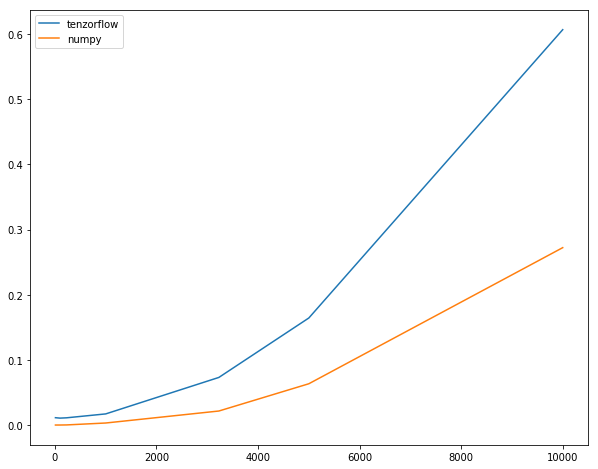

In [7]:
import time

sess = tf.Session()
tt=[]
nt=[]
ss=[10,100,228,1000,3228,5000,9999]

for n in ss:
    
    x =  tf.random.uniform((n,n))
    
    y = tf.reduce_sum(tf.diag_part(x)**2)
    
    begin = time.time()
    sess.run(y)
    
    end = time.time()
    time_spent = end - begin
    tt.append(time_spent)
    
    c=np.random.rand(n,n)
    begin = time.time()
    sum(np.diagonal(c**2))
    
    end = time.time()
    time_spent = end - begin
    nt.append(time_spent)      
          
          
    # remember time_spent
    ...

# The same but for numpy
    

# plot results

sess.close()

tt=np.array(tt)
plt.figure(figsize=(10,8))

plt.plot(ss,tt, label="tenzorflow")
plt.plot(ss,nt,label='numpy')
#plt.plot(x_support, slope_res * x_support + bias_res, label="derivative")
plt.legend()
plt.show()




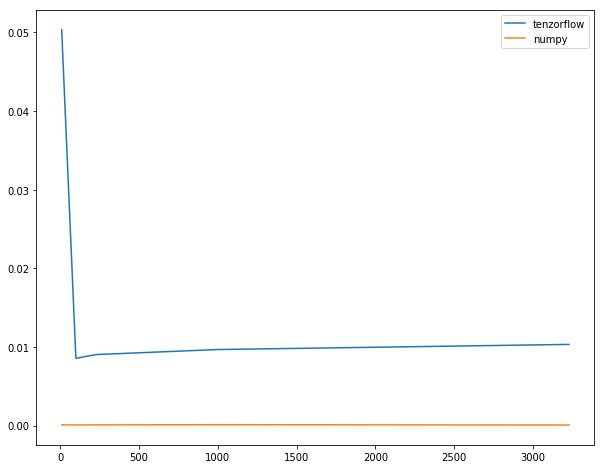

In [5]:
import time
import gc

sess = tf.Session()
tt=[]
nt=[]
ss=[10,100,228,1000,3228]

for n in ss:
    x = tf.random.uniform((n,1))
    z = tf.random.uniform((n,1))
    y = tf.acos(tf.matmul(tf.transpose(x), z))/(tf.linalg.norm(x)*tf.linalg.norm(z))
    
    begin = time.time()
    sess.run(y)
    
    end = time.time()
    time_spent = end - begin
    tt.append(time_spent)
    
    
    
    a=np.random.rand(n)
    b=np.random.rand(n)
    
    begin = time.time()
    
    np.arccos(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)))
    
    end = time.time()
    time_spent = end - begin
    nt.append(time_spent)      
          
          
    # remember time_spent
    ...

# The same but for numpy
    

# plot results

sess.close()

tt=np.array(tt)
plt.figure(figsize=(10,8))

plt.plot(ss,tt, label="tenzorflow")
plt.plot(ss,nt,label='numpy')
#plt.plot(x_support, slope_res * x_support + bias_res, label="derivative")
plt.legend()
plt.show()





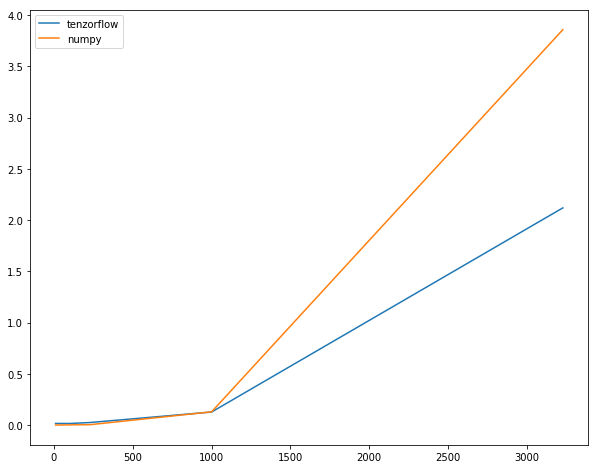

In [8]:
import time
import gc

sess = tf.Session()
tt=[]
nt=[]
ss=[10,100,228,1000,3228]

for n in ss:
    x = tf.random.uniform((n,n))
    z = tf.random.uniform((n,n))
    y = tf.reduce_sum(tf.matmul(x,z)-tf.matmul(z,x))
    
    begin = time.time()
    sess.run(y)
    
    end = time.time()
    time_spent = end - begin
    tt.append(time_spent)
    
    
    
    a=np.random.rand(n,n)
    b=np.random.rand(n,n)
    
    begin = time.time()
    
    sum(np.dot(a,b)-np.dot(b,a))
    
    end = time.time()
    time_spent = end - begin
    nt.append(time_spent)      
          
          
    # remember time_spent
    ...

# The same but for numpy
    

# plot results

sess.close()

tt=np.array(tt)
plt.figure(figsize=(10,8))

plt.plot(ss,tt, label="tenzorflow")
plt.plot(ss,nt,label='numpy')
#plt.plot(x_support, slope_res * x_support + bias_res, label="derivative")
plt.legend()
plt.show()






## Задание 2 -- градиенты и оптимайзеры (3 балла).

Продолжим работать с датасетом MNIST с размером картинок 8х8.

In [0]:
from sklearn.datasets import load_digits

mnist = load_digits()

X, y = mnist.data, mnist.target

n_labels = len(np.unique(y))

Многие алгоритмы оптимизации имплементированы в `tensorflow`. В этом задании мы сравним их при одинаковых параметрах, а также переберём разные параметры для одного алгоритма.

**Задание 2.1** (1.5 балла). Исследуйте вклад параметра momentum в методу `tf.train.MomentumOptimizer`. Для этого для разных значений momentum постройте графики значения функции потерь от номера итерации. При каких значениях momentum алгоритм сходится быстрее? Используйте `learning_rate=0.01`.

**Замечание**. В этом задании используется многоклассовая логистическая регрессия. Не меняйте код модели в ячейке ниже.

In [0]:
tf.reset_default_graph()

w = tf.Variable(np.ones((X.shape[1], n_labels)), dtype="float32")
X_input = tf.placeholder("float32", (None, X.shape[1]))
y_input = tf.placeholder("int32", (None,))

predicted = tf.nn.softmax(X_input @ w)
loss = tf.losses.log_loss(tf.one_hot(y_input, depth=n_labels), predicted)

In [0]:
def train(X, y, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X) // batch_size
        for epoch in range(1):
            loss_history = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history.append(loss_)
    return loss_history

In [0]:
def plott(loss_history,m_value):
  plt.figure(figsize=(10,8))
  
  for i, j in zip(loss_history,m_value):
    plt.plot(range(len(i)),i, label="momentum= {}".format(j))
  plt.xlabel('loss')
  plt.ylabel('Iteration')
  #plt.plot(x_support, slope_res * x_support + bias_res, label="derivative")
  plt.legend()
  plt.show()


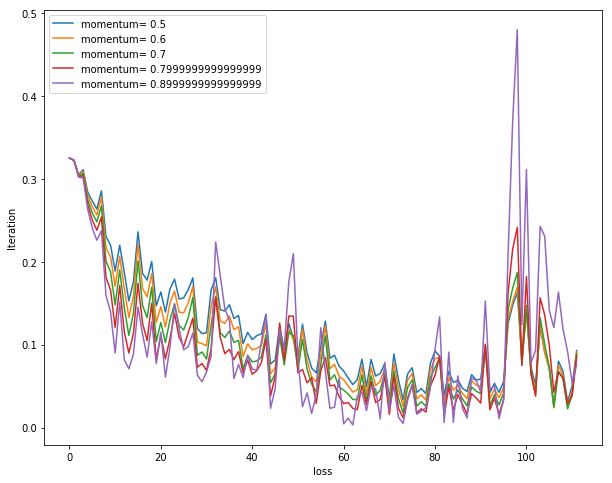

In [34]:

history=[]
iter_=np.arange(0.5,1,0.1)
for i in iter_:
  train_op=tf.train.MomentumOptimizer(learning_rate=0.01,momentum=i).minimize(loss)
  history.append(train(X,y,train_op))
plott(history,iter_)

Ваш ответ: ...

**Задание 2.2** (0.5 баллa). Исследуйте вклад `learning_rate`. Для этого для разных значений `learning_rate` постройте графики значения функции потерь от номера итерации. При каких значениях длины шага градиентного спуска алгоритм сходится быстрее? Используйте параметр метод MomentumOptimizer с параметром, который вы считаете лучшим по итогам предыдущего задания.

In [0]:
# YOUR CODE !

Ваш ответ:

**Задание 2.3** (0.5 балла) Проделайте то же, что и в пункте выше, но используйте в качестве базового алгоритма оптимизации `Adam` с дефолтными параметрами.

In [0]:
# YOUR CODE !

Ваш ответ: ...

**Задание 2.4** (0.5 балла) Сравните алгоритмы `Adam` и `Momentum` для данной задачи. Какой показывает себя лучше?

In [0]:
# YOUR CODE ! 

Ваш ответ: ...

## Задание 3 -- наша первая нейросеть, часть 2 (4 балла).

В этом задании мы напишем нейросеть для работы с датасетом MNIST размера 28х28. Исользовать можно только полносвязные (dense) слои! Для этого мы "вытянем" картинки 28х28 в длинный вектор размера 784.

In [0]:
import sys
import os
import time

import numpy as np

__doc__="""taken from https://github.com/Lasagne/Lasagne/blob/master/examples/mnist.py"""

def load_dataset():
    # We first define a download function, supporting both Python 2 and 3.
    if sys.version_info[0] == 2:
        from urllib import urlretrieve
    else:
        from urllib.request import urlretrieve

    def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
        print("Downloading %s" % filename)
        urlretrieve(source + filename, filename)

    # We then define functions for loading MNIST images and labels.
    # For convenience, they also download the requested files if needed.
    import gzip

    def load_mnist_images(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the inputs in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        # The inputs are vectors now, we reshape them to monochrome 2D images,
        # following the shape convention: (examples, channels, rows, columns)
        data = data.reshape(-1, 1, 28, 28)
        # The inputs come as bytes, we convert them to float32 in range [0,1].
        # (Actually to range [0, 255/256], for compatibility to the version
        # provided at http://deeplearning.net/data/mnist/mnist.pkl.gz.)
        return (data / np.float32(256)).squeeze()

    def load_mnist_labels(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the labels in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        # The labels are vectors of integers now, that's exactly what we want.
        return data

    # We can now download and read the training and test set images and labels.
    X_train = load_mnist_images('train-images-idx3-ubyte.gz')
    y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
    X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
    y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

    # We reserve the last 10000 training examples for validation.
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    # We just return all the arrays in order, as expected in main().
    # (It doesn't matter how we do this as long as we can read them again.)
    return X_train, y_train, X_val, y_val, X_test, y_test


In [39]:
#from mnist import load_dataset

X_train, y_train, X_test, y_test, _, _ = load_dataset()

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

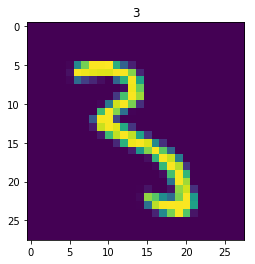

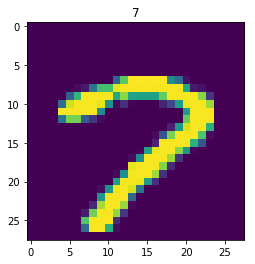

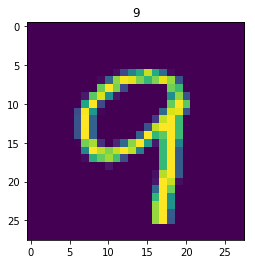

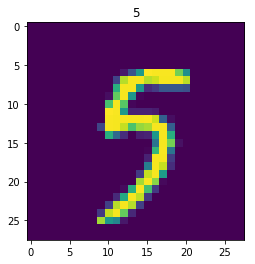

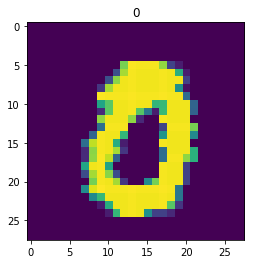

In [51]:
for i in [228, 1437, 322, 420, 69]:
    plt.title(y_train[i])
    plt.imshow(X_train[i].reshape((28, 28)))
    plt.show()

Подберите архитектуру и алгоритм оптимизации так, чтобы значение accuracy на тестовой выборке было не менее 97.5.

In [66]:
from sklearn.metrics import accuracy_score
tf.reset_default_graph()

def train_and_validate(X_train, y_train, X_test, y_test, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X_train) // batch_size
        n_batch_test = len(X_test) // batch_size
        for epoch in range(7):
            loss_history_train = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X_train[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_train[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_train.append(loss_)

        for epoch in range(1):
            loss_history_test = []
            prediction_history = []
            for b in range(n_batch_test):
                loss_, predicted_ = sess.run([loss, predicted], feed_dict={X_input: X_test[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_test[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_test.append(loss_)
                prediction_history += predicted_.argmax(-1).tolist()
            print("Test accuracy: ", accuracy_score(y_test, prediction_history))
    return loss_history_train, loss_history_test

X_input = tf.placeholder("float32", (None, 784)) # dim = [batch_size, 784]
y_input = tf.placeholder("int32", (None,)) # dim = [batch_size,]
layer1 = tf.layers.dense(X_input,716,activation=tf.nn.sigmoid)
layer2=tf.layers.dense(layer1,458,activation=tf.nn.relu)
layer3=tf.layers.dense(layer2,228,activation=tf.nn.sigmoid)
logits=tf.layers.dense(layer3,n_labels)
predicted=tf.nn.softmax(logits)




loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=tf.one_hot(y_input,depth=n_labels))
train_op =tf.train.AdamOptimizer().minimize(loss)

loss_history_train, loss_history_test = train_and_validate(X_train, y_train, X_test, y_test, train_op)

Test accuracy:  0.9778


## Задание 4 (0.1 баллов).

**Задание 4.1**. (0.1 баллов) Оставьте ниже смешную картинку (желательно про машинное обучение). Лучшую картинку мы поставим на аватарку чатика "Флуд про ИАД".

**Задание 4.2**. Напищите ниже фидбек по заданию и по курсу в целом. 